<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/Term_2_MLP_MPIE_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect Drive

In [1]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


##Load Trained Model

In [2]:
import pickle
results_file = 'results_MLP_202205290150.pickle'
with open(results_file, 'rb') as f:
  results = pickle.load(f)
results   # model, history, execution_time, _params

[(<keras.engine.sequential.Sequential at 0x7f5f78ecf550>,
  111.60530018806458,
  {'_activation': 'sigmoid',
   '_class_cnt': 4,
   '_hidden_layers': 0,
   '_kernel_initializer': None,
   '_optimizer': 'SGD',
   'batch_normal': True,
   'dense_count': 64,
   'epochs': 50,
   'label_class': 5}),
 (<keras.engine.sequential.Sequential at 0x7f5f6d993650>,
  225.8858082294464,
  {'_activation': 'sigmoid',
   '_class_cnt': 4,
   '_hidden_layers': 0,
   '_kernel_initializer': None,
   '_optimizer': 'SGD',
   'batch_normal': True,
   'dense_count': 64,
   'epochs': 100,
   'label_class': 5}),
 (<keras.engine.sequential.Sequential at 0x7f5f6d99a650>,
  24.354087114334106,
  {'_activation': 'sigmoid',
   '_class_cnt': 4,
   '_hidden_layers': 0,
   '_kernel_initializer': None,
   '_optimizer': 'Adam',
   'batch_normal': False,
   'dense_count': 64,
   'epochs': 10,
   'label_class': 5}),
 (<keras.engine.sequential.Sequential at 0x7f5f6d99a150>,
  120.65365481376648,
  {'_activation': 'sigmoid',
 

## show model

In [3]:
def drawModel(index, model, savefile=True):
  tf.keras.utils.plot_model(model, to_file=f'model_{index}.png', show_shapes=True, show_dtype=True, expand_nested=True, show_layer_activations=True, ) #layer_range=?, 

model = results[0][0]
# drawModel(None, model)
print(len(model.layers), model.layers, )

3 [<keras.layers.core.dense.Dense object at 0x7f5f79082810>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5f6dbfca10>, <keras.layers.core.dense.Dense object at 0x7f5f6dbbedd0>]


##drawing history model

In [4]:
import matplotlib.pyplot as plt

def drawModelHistory(index, history, training_time, filesave=True):
  _epochs = history.params['epochs']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(_epochs)
  # acc, list(epochs_range)

  plt.figure(figsize=(20, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(f'Training and Validation Accuracy ({index})')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(f'Training and Validation Loss ({index})')
  plt.savefig(f'history_{index}.png', bbox_inches='tight')
  plt.show()

history = results[0][1]
# drawModelHistory(None, history, None)

##make list from anothers params

In [5]:
training_time = results[0][2]
params = results[0][3]

In [6]:
history.history.keys(), history.params.keys(), training_time, params.keys()

(dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']),
 dict_keys(['verbose', 'epochs', 'steps']),
 111.60530018806458,
 dict_keys(['_hidden_layers', 'dense_count', '_kernel_initializer', '_activation', '_optimizer', 'batch_normal', 'epochs', 'label_class', '_class_cnt']))

In [7]:
# list(history.history.values())[0], type(history.history.values()), 

In [8]:
import numpy as np

history_values = np.array(list(history.history.values()))
history_values.shape, history_values[:,-1], list(history_values[:,-1])


((4, 49),
 array([0.01257643, 0.99822944, 0.06231652, 0.98053479]),
 [0.012576429173350334,
  0.998229444026947,
  0.062316518276929855,
  0.9805347919464111])

In [9]:
history_values = list(np.array(list(history.history.values()))[:,-1])
history_values

[0.012576429173350334,
 0.998229444026947,
 0.062316518276929855,
 0.9805347919464111]

In [10]:
list(history.params.values())

[1, 50, 1024]

In [11]:
params_values = list(params.values())
# params_values

In [12]:
_training_time = [training_time]
_training_time, type(_training_time)

([111.60530018806458], list)

In [13]:
import numpy as np
# value list : params + history values + model layers + training time + history params
def resultvaluesTolist(model, history, training_time, params):
  model_layer_depth = [len(model.layers)]
  history_values = list(np.array(list(history.history.values()))[:,-1])
  history_params = list(history.params.values())
  _training_time = [training_time]
  params_values = list(params.values())
  _value_list = params_values + history_values + model_layer_depth + _training_time + history_params
  return _value_list
value_list = resultvaluesTolist(model, history, training_time, params)
# value_list

## store results

In [14]:
import tensorflow as tf
result_list = list()
for idx, result in enumerate(results):
  model, history, training_time, params = result[0], result[1], result[2], result[3]
  print(f'Training Time : {training_time:.3f} sec')
  # drawModelHistory(idx, history, training_time)
  result_list.append(resultvaluesTolist(model, history, training_time, params))


Training Time : 111.605 sec
Training Time : 225.886 sec
Training Time : 24.354 sec
Training Time : 120.654 sec
Training Time : 248.861 sec
Training Time : 28.449 sec
Training Time : 120.754 sec
Training Time : 238.627 sec
Training Time : 25.248 sec
Training Time : 123.036 sec
Training Time : 248.383 sec
Training Time : 28.022 sec
Training Time : 122.356 sec
Training Time : 248.017 sec
Training Time : 28.140 sec
Training Time : 136.174 sec
Training Time : 267.415 sec
Training Time : 30.767 sec


##evaluation with params value

In [15]:
column_name = list(params.keys())+list(history.history.keys())+['model_layer_depth','training_time']+list(history.params.keys())
print(column_name, len(column_name))

['_hidden_layers', 'dense_count', '_kernel_initializer', '_activation', '_optimizer', 'batch_normal', 'epochs', 'label_class', '_class_cnt', 'loss', 'accuracy', 'val_loss', 'val_accuracy', 'model_layer_depth', 'training_time', 'verbose', 'epochs', 'steps'] 18


In [16]:
import pandas as pd
result_df = pd.DataFrame(data=result_list, columns=column_name)
# result_df_epochs
result_df_epochs = result_df.iloc[:,[6]]

result_df.drop(labels='epochs', axis=1, inplace=True)
result_df = pd.concat([result_df, result_df_epochs], axis=1)
result_df.keys()
result_df

,_hidden_layers,dense_count,_kernel_initializer,_activation,_optimizer,batch_normal,label_class,_class_cnt,loss,accuracy,val_loss,val_accuracy,model_layer_depth,training_time,verbose,steps,epochs
0,0,64,None,sigmoid,SGD,True,5,4,0.012576,0.998229,0.062317,0.980535,3,111.605300,1,1024,50
1,0,64,None,sigmoid,SGD,True,5,4,0.005976,0.999470,0.033395,0.991152,3,225.885808,1,1024,100
2,0,64,None,sigmoid,Adam,False,5,4,0.082713,0.987805,0.078771,0.986630,2,24.354087,1,1024,10
3,0,64,None,sigmoid,Adam,False,5,4,0.001141,1.000000,0.018963,0.995281,2,120.653655,1,1024,50
4,0,64,None,sigmoid,Adam,False,5,4,0.000935,1.000000,0.018519,0.994691,2,248.860781,1,1024,100
5,0,64,None,sigmoid,Adam,True,5,4,0.057832,0.983193,0.242962,0.932363,3,28.448660,1,1024,10
6,0,64,None,sigmoid,SGD,True,5,4,0.051349,0.979816,0.037876,0.988793,3,120.753524,1,1024,50
7,0,64,None,sigmoid,SGD,True,5,4,0.027261,0.990539,0.019179,0.993905,3,238.627458,1,1024,100
8,0,64,None,sigmoid,Adam,False,5,4,0.043033,0.985381,0.064741,0.974440,2,25.248306,1,1024,10
9,0,64,None,sigmoid,Adam,False,5,4,0.005314,0.998407,0.034011,0.986433,2,123.035843,1,1024,50


In [17]:
result_columns = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

# result_df_useful = result_df.loc[:,'filters':'training_time']
result_df_useful = result_df.sort_values(result_columns, ascending = [True, False, True, False])

result_df_useful

,_hidden_layers,dense_count,_kernel_initializer,_activation,_optimizer,batch_normal,label_class,_class_cnt,loss,accuracy,val_loss,val_accuracy,model_layer_depth,training_time,verbose,steps,epochs
16,0,64,None,sigmoid,Adam,False,5,4,0.000697,1.000000,0.019001,0.994495,2,267.414723,1,1024,100
4,0,64,None,sigmoid,Adam,False,5,4,0.000935,1.000000,0.018519,0.994691,2,248.860781,1,1024,100
3,0,64,None,sigmoid,Adam,False,5,4,0.001141,1.000000,0.018963,0.995281,2,120.653655,1,1024,50
10,0,64,None,sigmoid,Adam,False,5,4,0.001263,0.999823,0.020106,0.991939,2,248.383437,1,1024,100
15,0,64,None,sigmoid,Adam,False,5,4,0.002641,0.999646,0.020646,0.993905,2,136.174119,1,1024,50
9,0,64,None,sigmoid,Adam,False,5,4,0.005314,0.998407,0.034011,0.986433,2,123.035843,1,1024,50
1,0,64,None,sigmoid,SGD,True,5,4,0.005976,0.999470,0.033395,0.991152,3,225.885808,1,1024,100
0,0,64,None,sigmoid,SGD,True,5,4,0.012576,0.998229,0.062317,0.980535,3,111.605300,1,1024,50
7,0,64,None,sigmoid,SGD,True,5,4,0.027261,0.990539,0.019179,0.993905,3,238.627458,1,1024,100
13,0,64,None,sigmoid,SGD,True,5,4,0.041315,0.984350,0.748479,0.788439,3,248.017253,1,1024,100


###Ascending Rank with low loss and high accuracy
기준 : low loss and high accuracy (Overfitting은 다른 모델 방식에서 고려)

In [18]:
result_rank = 6

In [19]:
result_df_rank = result_df_useful.iloc[:result_rank]
result_df_rank

,_hidden_layers,dense_count,_kernel_initializer,_activation,_optimizer,batch_normal,label_class,_class_cnt,loss,accuracy,val_loss,val_accuracy,model_layer_depth,training_time,verbose,steps,epochs
16,0,64,None,sigmoid,Adam,False,5,4,0.000697,1.000000,0.019001,0.994495,2,267.414723,1,1024,100
4,0,64,None,sigmoid,Adam,False,5,4,0.000935,1.000000,0.018519,0.994691,2,248.860781,1,1024,100
3,0,64,None,sigmoid,Adam,False,5,4,0.001141,1.000000,0.018963,0.995281,2,120.653655,1,1024,50
10,0,64,None,sigmoid,Adam,False,5,4,0.001263,0.999823,0.020106,0.991939,2,248.383437,1,1024,100
15,0,64,None,sigmoid,Adam,False,5,4,0.002641,0.999646,0.020646,0.993905,2,136.174119,1,1024,50
9,0,64,None,sigmoid,Adam,False,5,4,0.005314,0.998407,0.034011,0.986433,2,123.035843,1,1024,50


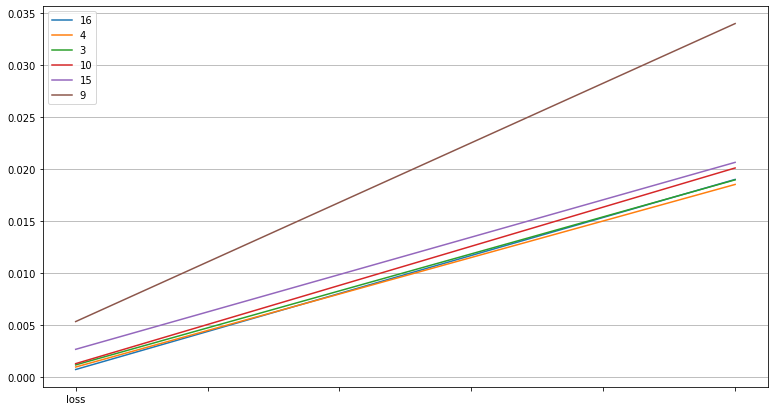

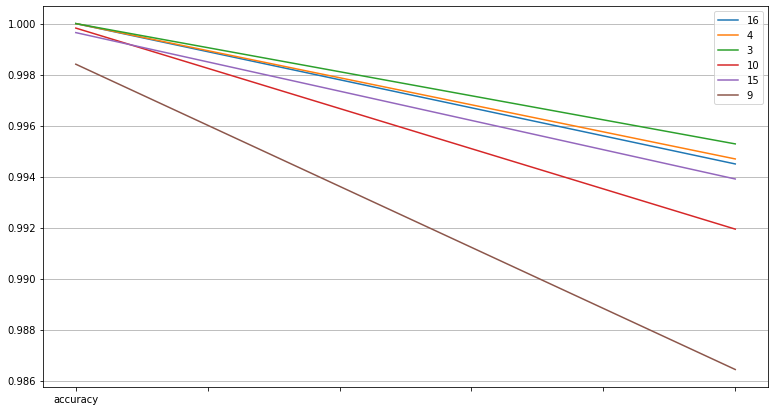

In [20]:
# result_df_rank[result_columns]
plt.rcParams["figure.figsize"] = (13, 7)
result_df_rank[['loss', 'val_loss']].T.plot()
plt.grid(axis='y')
# plt.xticks(rotation=20)
plt.show()

result_df_rank[['accuracy', 'val_accuracy']].T.plot()
plt.grid(axis='y')
# plt.xticks(rotation=20)
plt.show()

In [21]:
result_df_rank_str = result_df_rank.astype('str')
result_df_rank_str.dtypes
result_df_rank_str

,_hidden_layers,dense_count,_kernel_initializer,_activation,_optimizer,batch_normal,label_class,_class_cnt,loss,accuracy,val_loss,val_accuracy,model_layer_depth,training_time,verbose,steps,epochs
16,0,64,None,sigmoid,Adam,False,5,4,0.0006970723043195903,1.0,0.019001353532075882,0.9944946765899658,2,267.4147231578827,1,1024,100
4,0,64,None,sigmoid,Adam,False,5,4,0.000935260730329901,1.0,0.01851928047835827,0.9946913123130798,2,248.86078095436096,1,1024,100
3,0,64,None,sigmoid,Adam,False,5,4,0.001140870968811214,1.0,0.018962906673550606,0.9952811598777771,2,120.65365481376648,1,1024,50
10,0,64,None,sigmoid,Adam,False,5,4,0.0012625678209587932,0.9998231530189514,0.020105598494410515,0.9919386506080627,2,248.38343715667725,1,1024,100
15,0,64,None,sigmoid,Adam,False,5,4,0.0026405639946460724,0.9996458888053894,0.020645707845687866,0.9939048290252686,2,136.17411923408508,1,1024,50
9,0,64,None,sigmoid,Adam,False,5,4,0.005314128939062357,0.9984065294265747,0.03401130810379982,0.9864333271980286,2,123.03584289550781,1,1024,50


In [22]:
columns_mask_str = result_df_rank_str.columns.map(lambda x: True if (x not in ('loss','accuracy','val_loss','val_accuracy','verbose','training_time','steps')) else False )
columns_mask_str, len(list(columns_mask_str))

(Index([ True,  True,  True,  True,  True,  True,  True,  True, False, False,
        False, False,  True, False, False, False,  True],
       dtype='object'), 17)

In [23]:
result_df_rank_str_pick = result_df_rank_str.loc[:,columns_mask_str].value_counts().reset_index()
type(result_df_rank_str_pick), 
result_df_rank_str_pick.drop(labels=0, axis=1, inplace=True)
result_df_rank_str_pick

,_hidden_layers,dense_count,_kernel_initializer,_activation,_optimizer,batch_normal,label_class,_class_cnt,model_layer_depth,epochs
0,0,64,None,sigmoid,Adam,False,5,4,2,100
1,0,64,None,sigmoid,Adam,False,5,4,2,50


##학습 결과 영향 params 확인

In [24]:
result_measure_columns = list()
for column in result_df_rank_str_pick.columns:
  if len(result_df_rank_str_pick[column].unique()) > 1:
    result_measure_columns.append(column)
result_measure_columns

['epochs']

In [25]:
result_columns = result_columns + result_measure_columns
result_df_rank_params = result_df_rank[result_columns]
result_df_rank_params

,loss,val_loss,accuracy,val_accuracy,epochs
16,0.000697,0.019001,1.000000,0.994495,100
4,0.000935,0.018519,1.000000,0.994691,100
3,0.001141,0.018963,1.000000,0.995281,50
10,0.001263,0.020106,0.999823,0.991939,100
15,0.002641,0.020646,0.999646,0.993905,50
9,0.005314,0.034011,0.998407,0.986433,50


In [30]:
result_df_rank_params['loss_gap'] = result_df_rank_params['loss'] - result_df_rank_params['val_loss']
result_df_rank_params['accuracy_gap'] = result_df_rank_params['accuracy'] - result_df_rank_params['val_accuracy']
result_df_rank_params

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loss,val_loss,accuracy,val_accuracy,epochs,loss_gap,accuracy_gap
16,0.000697,0.019001,1.000000,0.994495,100,-0.018304,0.005505
4,0.000935,0.018519,1.000000,0.994691,100,-0.017584,0.005309
3,0.001141,0.018963,1.000000,0.995281,50,-0.017822,0.004719
10,0.001263,0.020106,0.999823,0.991939,100,-0.018843,0.007885
15,0.002641,0.020646,0.999646,0.993905,50,-0.018005,0.005741
9,0.005314,0.034011,0.998407,0.986433,50,-0.028697,0.011973


In [26]:
file_name = 'Term_2_CNN_MPIE_results.csv'
result_df_rank_params.to_csv(file_name)